In [ ]:
import keras
from keras import models, layers
from keras import datasets
from keras import backend
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_classes = 10
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [ ]:
'''
cnn을 다룰때는 채널이 중요.
흑백이미지라도 1이라는 값을 넣어줘야 한다.

'''

'\ncnn을 다룰때는 채널이 중요.\n흑백이미지라도 1이라는 값을 넣어줘야 한다.\n\n'

In [ ]:
# backend로 채널이 어떤 위치에 있는지 확인가능
channel = backend.image_data_format()
channel

'channels_last'

In [ ]:
N,H,W = X_train.shape

if backend.image_data_format() == 'channels_first':
    X_train = X_train[:,np.newaxis,:,:]
    X_test = X_test[:,np.newaxis,:,:]
    input_shape = (1, H, W)

elif backend.image_data_format() == 'channels_last':
    X_train = X_train[:,:,:,np.newaxis]
    X_test = X_test[:,:,:,np.newaxis]
    input_shape = (H, W, 1)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), # defualt -> stride = 1 padding = 0
                        activation='relu', input_shape = input_shape))  # 26 x 26 x 32

model.add(layers.Conv2D(64, kernel_size=(3,3),  
                        activation='relu'))  # 24 x 24 x 64

model.add(layers.MaxPool2D(pool_size=(2,2))) # defualt -> stride = 2 # 12 x 12 x 64 

model.add(layers.Dropout(0.25))
model.add(layers.Flatten())  # 9216

model.add(layers.Dense(128, activation='relu')) # 9216 -> 128
model.add(layers.Dropout(0.25))
model.add(layers.Dense(num_classes, activation='softmax')) # 128 -> 10

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=100, epochs=50, validation_split=.2, verbose=2)

Epoch 1/50
480/480 - 3s - loss: 0.1828 - accuracy: 0.9431 - val_loss: 0.0651 - val_accuracy: 0.9816
Epoch 2/50
480/480 - 2s - loss: 0.0599 - accuracy: 0.9823 - val_loss: 0.0499 - val_accuracy: 0.9862
Epoch 3/50
480/480 - 2s - loss: 0.0428 - accuracy: 0.9874 - val_loss: 0.0401 - val_accuracy: 0.9883
Epoch 4/50
480/480 - 2s - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0377 - val_accuracy: 0.9883
Epoch 5/50
480/480 - 2s - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0435 - val_accuracy: 0.9888
Epoch 6/50
480/480 - 2s - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0435 - val_accuracy: 0.9878
Epoch 7/50
480/480 - 2s - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0456 - val_accuracy: 0.9885
Epoch 8/50
480/480 - 2s - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0496 - val_accuracy: 0.9886
Epoch 9/50
480/480 - 2s - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0347 - val_accuracy: 0.9897
Epoch 10/50
480/480 - 2s - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0409 - val_accuracy: 0.9904

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch') # X 측이 늘어남에 따라서 Y축이 얼마나 떨어지는가가 궁금한것이다.
    plt.legend(['Train','Validation'])
    plt.savefig('Loss_Plot.png', dpi=300)
    plt.show()

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'])
    plt.savefig('zAcc_Plot.png', dpi=300)
    plt.show()

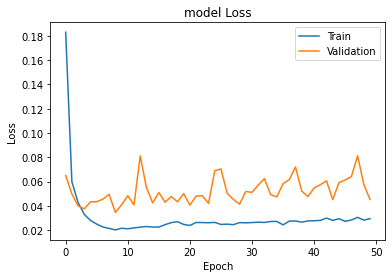

In [ ]:
plot_loss(model.history)

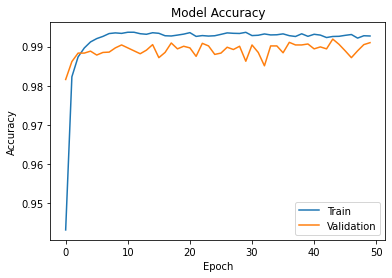

In [ ]:
plot_acc(model.history)

In [ ]:
# evaluation
model_performance = model.evaluate(X_test, Y_test, batch_size=100)
print('loss: {}\nAccuray: {}'.format(*model_performance))

100/100 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9912
loss: 0.042537327855825424
Accuray: 0.9911999702453613


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

## 모델저장

In [ ]:
model.save('my_model.h5')